In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from pandas import Series, DataFrame


In [181]:
import os
cwd=os.getcwd()

from os.path import join

In [182]:
data=pd.read_csv("AwardsDirectors.csv")

In [183]:
data.dtypes

director_name         object
ceremony              object
year                 float64
category              object
outcome               object
original_language     object
dtype: object

In [184]:
data['year']=data.year.astype(int) ##changed year from float to int

In [185]:
data.shape

(225675, 6)

In [186]:
pd.isna(data).sum() ##checking for null values

director_name        0
ceremony             0
year                 0
category             1
outcome              0
original_language    0
dtype: int64

In [187]:
m=pd.isna(data.category)

In [188]:
data[m] ##looking at null value, doesn't impact too much, I won't remove

,director_name,ceremony,year,category,outcome,original_language
169069,Lauren Wolkstein,Bratislava Francophone Film Festival,2011,NaN,Nominated,en


In [189]:
data.apply(lambda x:x.nunique())

director_name        29503
ceremony              3428
year                    94
category              8286
outcome                  4
original_language       93
dtype: int64

In [190]:
s_ltoc=pd.read_csv("LanguagetoCountry.csv",squeeze=True) ##adding new csv file

In [191]:
two_three=pd.Series(data=s_ltoc.map(lambda x:x.split(';')[1]),index=s_ltoc.map(lambda x:x.split(';')[0]),name='country_code')

In [192]:
rhs=set(s_ltoc.map(lambda x:x.split(';')[0]))

In [193]:
lhs_orig_lan=set(data.original_language)

In [194]:
df2=pd.merge(left=data,right=two_three,left_on='original_language',right_index=True,how='left') ##merging new csv file

In [195]:
df2.columns.tolist()

['director_name',
 'ceremony',
 'year',
 'category',
 'outcome',
 'original_language',
 'country_code']

In [196]:
pd.isna(df2).sum()

director_name             0
ceremony                  0
year                      0
category                  1
outcome                   0
original_language         0
country_code         225675
dtype: int64

In [197]:
df2.apply(lambda x:x.nunique()) ##checking unique values, instead of repeating len(pd.unique(df['year']

director_name        29503
ceremony              3428
year                    94
category              8286
outcome                  4
original_language       93
country_code             0
dtype: int64

In [198]:
df_year=df2.set_index(['year','ceremony']).sort_index()

In [199]:
df_year.loc[(2017)]

,director_name,category,outcome,original_language,country_code
ceremony,,,,,
12 Months Film Festival,Jean-Luc Julien,August Award,Nominated,en,NaN
12 Months Film Festival,Davide Melini,July Award,Won,en,NaN
12 Months Film Festival,Davide Melini,July Award,2nd place,en,NaN
"168 Film Festival, US",Wes Llewellyn,Best Director,Won,en,NaN
"168 Film Festival, US",Wes Llewellyn,Best Film,3rd place,en,NaN
...,...,...,...,...,...
iHorror Awards,Ryan Byrne,iHorror Award,Won,en,NaN
iHorror Awards,Tim Egan,iHorror Award,Won,en,NaN
iHorror Awards,Blake Mawson,iHorror Award,Nominated,ru,NaN


In [200]:
df_director=df2.set_index('director_name').sort_index()

In [201]:
df_director[20:30]

,ceremony,year,category,outcome,original_language,country_code
director_name,,,,,,
50 Cent,MTV Video Music Awards (VMA),2005,VMA,Nominated,en,NaN
50 Cent,Grammy Awards,2006,Grammy,Nominated,en,NaN
50 Cent,Grammy Awards,2008,Grammy,Nominated,en,NaN
50 Cent,Satellite Awards,2005,Satellite Award,Nominated,en,NaN
50 Cent,Teen Choice Awards,2006,Teen Choice Award,Nominated,en,NaN
50 Cent,Black Reel Awards,2004,Black Reel,Nominated,en,NaN
A. Blaine Miller,Park City Film Music Festival,2006,Gold Medal for Excellence,Won,en,NaN
A. Blaine Miller,Great Lakes Film Festival,2005,Festival Prize,Won,en,NaN
A. Blaine Miller,Breckenridge Festival of Film,2005,Best of the Fest,Won,en,NaN


In [202]:
df2.outcome.value_counts(normalize=True).index.tolist() ##making dictionary

['Nominated', 'Won', '2nd place', '3rd place']

In [203]:
score_system=dict.fromkeys(df2.outcome.value_counts().index.tolist()) ##adding more numerical values by creating score system

In [204]:
score_system

{'Nominated': None, 'Won': None, '2nd place': None, '3rd place': None}

In [205]:
score_system.keys()

dict_keys(['Nominated', 'Won', '2nd place', '3rd place'])

In [206]:
score_system['Won']=10
score_system['Nominated']=1
score_system['2nd place']=3
score_system['3rd place']=2

In [207]:
df2['score']=df2.outcome.map(score_system)

In [208]:
df2.score.describe()

count    225675.000000
mean          5.439371
std           4.472162
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max          10.000000
Name: score, dtype: float64

In [223]:
score_dir_cer=df2.groupby(['director_name','ceremony'])[['score']].sum().sort_values(by='score',ascending=False)
print(score_dir_cer)

                                                             score
director_name            ceremony                                 
Shawn Welling            WorldFest Houston                     390
David Winning            WorldFest Houston                     330
Walt Disney              Academy Awards, USA                   256
John Williams            BMI Film & TV Awards                  210
James L. Brooks          Primetime Emmy Awards                 207
...                                                            ...
Mikko Niskanen           Moscow International Film Festival      1
Miklós Jancsó            Berlin International Film Festival      1
Dominique Othenin-Girard Berlin International Film Festival      1
                         Baden-Baden TV Film Festival            1
\tCheung Chi-Sing        Golden Horse Film Festival              1

[147874 rows x 1 columns]


In [224]:
score_dir_cer.sort_index().to_excel(join(cwd,'director_ceremony.xlsx'))

In [225]:
year_dir=df2.groupby(['director_name'])[['year']].mean().sort_values(by='year')

In [212]:
year_dir.loc['Walt Disney']

year    1952.370787
Name: Walt Disney, dtype: float64

In [227]:
top_directors=df2.groupby(['director_name'])[['score']].sum().sort_values(by='score',ascending=False)

In [228]:
top_directors

,score
director_name,
Steven Spielberg,1863
Don Hertzfeldt,1590
Martin Scorsese,1540
Clint Eastwood,1527
Woody Allen,1444
...,...
Kenneth J. Hall,1
Kenneth Castillo,1
Kenne Fant,1


In [46]:
score_dir_cat.loc[('Steven Spielberg','Oscar')]

NameError: name 'score_dir_cat' is not defined

In [215]:
# Not run for bar chart
top20_ceremonies=df2.ceremony.value_counts()[:20].index.to_list()

In [216]:
# Not run for bar chart
m=df2.ceremony.isin(top20_ceremonies)

In [217]:
# Not run for bar chart
df_top20_ceremonies=df2[m].copy()

In [218]:
# Not run for bar chart
top_directors=df_top20_ceremonies.groupby(['director_name'])[['score']].sum().sort_values(by='score',ascending=False)

In [229]:
df_top_direc=top_directors[:20]
print(df_top_direc.index)

Index(['Steven Spielberg', 'Don Hertzfeldt', 'Martin Scorsese',
       'Clint Eastwood', 'Woody Allen', 'Joel Coen', 'Quentin Tarantino',
       'Pedro Almodóvar', 'Peter Jackson', 'Christopher Nolan',
       'Alejandro González Iñárritu', 'John Williams', 'Ethan Coen',
       'Richard Linklater', 'Ang Lee', 'George Clooney', 'Ken Loach',
       'Jack Nicholson', 'Philip Hoffman', 'Philip Seymour Hoffman'],
      dtype='object', name='director_name')


In [230]:
x_axis=df_top_direc.index

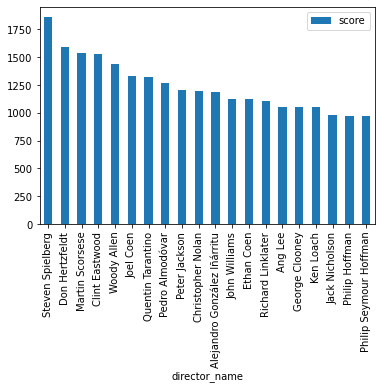

In [231]:
plot_test=df_top_direc.plot.bar(y='score', use_index=True)

AttributeError: 'BarContainer' object has no attribute 'get_xticklabels'

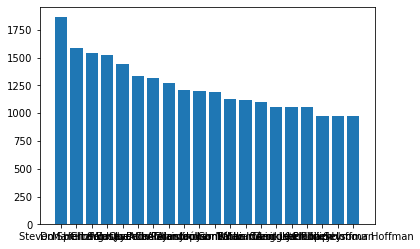

In [243]:
x_ax=df_top_direc.index.tolist()
plot_test_mpl=mpl.bar(x=x_ax, height=df_top_direc['score'])
for tick in plot_test_mpl.get_xticklabels():
    tick.set_rotation(90)

<BarContainer object of 0 artists>

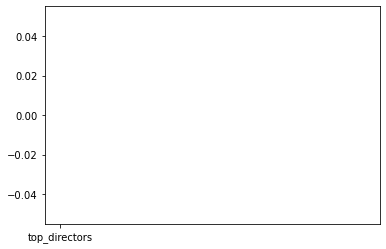

ValueError: shape mismatch: objects cannot be broadcast to a single shape

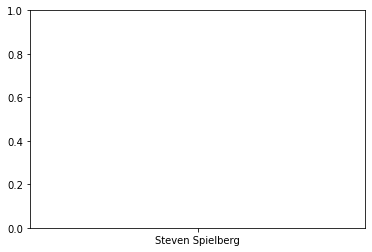

director_name
Steven Spielberg               1863
Don Hertzfeldt                 1590
Martin Scorsese                1540
Clint Eastwood                 1527
Woody Allen                    1444
Joel Coen                      1331
Quentin Tarantino              1319
Pedro Almodóvar                1272
Peter Jackson                  1205
Christopher Nolan              1201
Alejandro González Iñárritu    1190
John Williams                  1128
Ethan Coen                     1122
Richard Linklater              1104
Ang Lee                        1054
George Clooney                 1053
Ken Loach                      1053
Jack Nicholson                  978
Philip Hoffman                  973
Philip Seymour Hoffman          973
Name: score, dtype: int64

'score'